In [14]:
import keras
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import SGD
from keras.initializers import RandomNormal
from keras.models import load_model
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print('train data dim:', x_train.shape)
print('test data dim:', x_test.shape)
print('test label dim:', y_test.shape)
print('max of train data:',np.max(x_train))
print('min of train data:',np.min(x_train))
print('max of test data:',np.max(x_test))
print('min of test data:',np.min(x_test))

train data dim: (60000, 28, 28)
test data dim: (10000, 28, 28)
test label dim: (10000,)
max of train data: 255
min of train data: 0
max of test data: 255
min of test data: 0


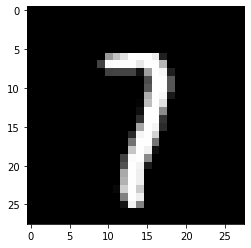

label: 7


In [4]:
# generate a random number. (use numpy random.randint)
rand_num = np.random.randint(60000)
# plot using plt.imshow() & plt.show()
plt.imshow(x_train[rand_num],cmap='gray')
plt.show()
# print its label
print('label:', y_train[rand_num])

In [6]:
# Reshape x_train and x_test
x_train = np.reshape(x_train,[-1, 28*28])
x_test = np.reshape(x_test,[-1, 28*28])

In [7]:
x_train = x_train/np.max(x_train)
x_test = x_test/np.max(x_train)

In [8]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [17]:
model = Sequential()
# Add the layers to model here.
model.add(Dense(512, activation='relu', input_shape=(784,), kernel_initializer= RandomNormal(0,0.01)))
model.add(Dense(512, activation='relu', kernel_initializer= RandomNormal(0,0.01)))
model.add(Dense(10, activation='softmax', kernel_initializer= RandomNormal(0,0.01)))

In [18]:

sgd = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy',
             optimizer=sgd,
             metrics = ['accuracy'])

In [19]:
model.summary()
# Here we saved the raw model without any training. we will use it later.
model.save('raw_model.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = model.fit(x_train, y_train,
                    batch_size = 32,
                    epochs = 3,
                    verbose = 1,
                    validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/3
48000/48000 [==============================] - 15s 317us/step - loss: 2.2065 - acc: 0.2705 - val_loss: 1.6830 - val_acc: 0.5968
Epoch 2/3
48000/48000 [==============================] - 13s 262us/step - loss: 0.8418 - acc: 0.7618 - val_loss: 0.4985 - val_acc: 0.8572
Epoch 3/3
48000/48000 [==============================] - 13s 265us/step - loss: 0.4561 - acc: 0.8704 - val_loss: 0.3763 - val_acc: 0.8930


In [21]:

te_score = model.evaluate(x_test, y_test, verbose = 0)
print('Test Loss:', te_score[0])
print('Test accuracy:', te_score[1])

Test Loss: 1.8054422295033932
Test accuracy: 0.886
